In [1]:
import numpy 
import pandas as pd
import seaborn
import xgboost
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("hypertension_data.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0
26082,67.0,0.0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [8]:
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
rows = len(df.axes[0])
print(rows)

26083


In [10]:
cols = len(df.axes[1])
print(cols)

14


In [11]:
df.shape

(26083, 14)

In [12]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

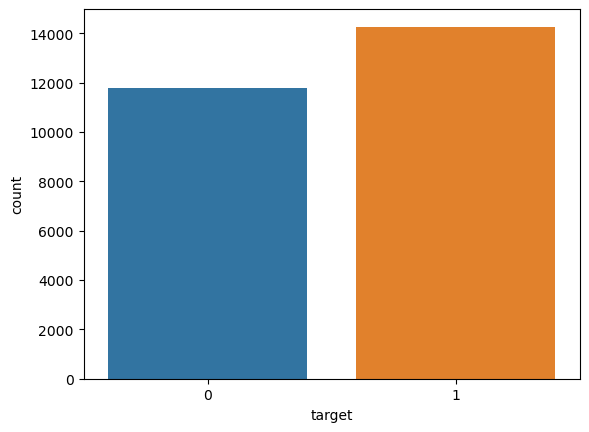

In [13]:
seaborn.countplot(df['target'])

In [14]:
df['sex'] =df['sex'].fillna(2)

In [15]:
df['sex'].isnull().sum()

0

<AxesSubplot:>

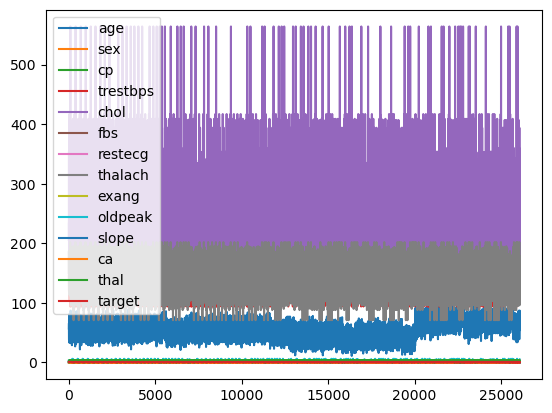

In [16]:
df.plot()

In [17]:
data0 = df[df['target'] == 0]
data1 = df[df['target'] == 1]
total_0 = data0["target"].count()
total_1 = data1["target"].count()
print("Number of 0 data:",total_0)
print("Number of 1 data:",total_1)

pct_0 = total_0 / (total_0 + total_1) * 100
pct_1 = total_1 / (total_0 + total_1) * 100
print("O data = ",pct_0)
print("1 data = ",pct_1)

Number of 0 data: 11809
Number of 1 data: 14274
O data =  45.274699996166085
1 data =  54.72530000383391


In [18]:
target1 = df['target']
train , test = train_test_split(df, test_size=0.3, shuffle=True, random_state=32,stratify=target1)

In [19]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
13320,50.0,0.0,0,150,270,0,0,111,1,0.8,2,0,3,0
3999,61.0,0.0,1,108,309,0,1,156,0,0.0,2,0,3,1
1669,51.0,0.0,0,120,198,0,1,130,1,1.6,1,0,3,0
19113,67.0,0.0,2,140,197,0,2,116,0,1.1,1,0,2,1
5227,54.0,1.0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24929,78.0,0.0,0,132,353,0,1,132,1,1.2,1,1,3,0
3486,47.0,0.0,0,180,327,0,2,117,1,3.4,1,0,2,0
5495,75.0,0.0,0,178,228,1,1,165,1,1.0,1,2,3,0
24557,78.0,0.0,0,106,223,0,1,142,0,0.3,2,2,2,1


In [20]:
print(pd.value_counts(train['target']))

1    9992
0    8266
Name: target, dtype: int64


In [21]:
train_x,test_y=train_test_split(df,test_size=0.3,stratify=df['target'])
total_0 = train[train['target'] == 1].shape[0]
total_1 = train[train['target'] == 0].shape[0]
ratio = total_0 / total_1
print("O data:", total_0)
print("1 data :", total_1)
print("O data ratio:", total_0/(total_0+total_1))
print("1 data ratio:", total_1/(total_0+total_1))

O data: 9992
1 data : 8266
O data ratio: 0.5472669514733267
1 data ratio: 0.45273304852667323


In [22]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
21841,72.0,0.0,0,132,247,1,0,143,1,0.1,1,4,3,0
23114,56.0,1.0,2,150,232,0,0,165,0,1.6,2,0,3,1
11197,47.0,1.0,1,105,204,0,1,172,0,0.0,2,0,2,1
12658,68.0,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0
19576,18.0,1.0,1,160,246,0,1,120,1,0.0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,66.0,0.0,1,130,221,0,0,163,0,0.0,2,0,3,1
20592,64.0,1.0,0,132,341,1,0,136,1,3.0,1,0,3,0
26058,72.0,0.0,0,140,394,0,0,157,0,1.2,1,0,2,1
16212,30.0,1.0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [23]:
print(pd.value_counts(test['target']))

1    4282
0    3543
Name: target, dtype: int64


In [24]:
train_x,test_y=train_test_split(df,test_size=0.3,stratify=df['target'])
total_0 = test[test['target'] == 1].shape[0]
total_1 = test[test['target'] == 0].shape[0]
ratio = total_0 / total_1
print("O data:", total_0)
print("1 data :", total_1)
print("O data ratio:", total_0/(total_0+total_1))
print("1 data ratio:", total_1/(total_0+total_1))

O data: 4282
1 data : 3543
O data ratio: 0.547220447284345
1 data ratio: 0.45277955271565495


# Separate target column for training 

In [25]:
train_x = train.drop(columns = ['target'] , axis =1)

In [26]:
train_y = train['target']

# Separate target column for testing

In [27]:
test_x = test.drop(columns = ['target'] , axis =1)

In [28]:
test_y = test['target']

# Random Forest

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(train_x , train_y)

RandomForestClassifier()

In [31]:
y_pred = model.predict(test_x)

In [32]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


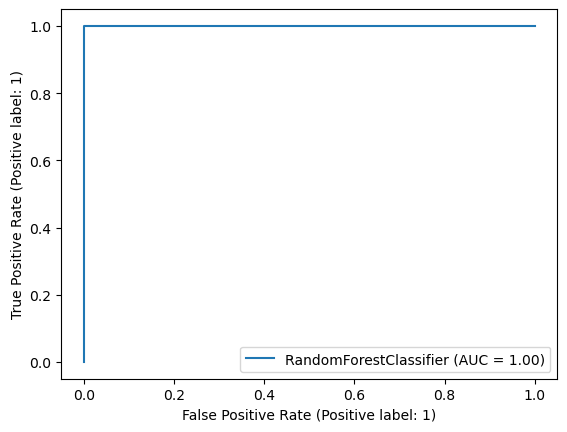

In [33]:
disp = plot_roc_curve(model, test_x, test_y)
plt.show()

# Manual Calculation

In [34]:
TP,FN,FP,TN = c.reshape(-1)
print('Outcome values : \n', TP,FN,FP,TN)

Outcome values : 
 3543 0 0 4282


In [35]:
print('\nAccuracy: ',(TP+TN)/(TP+FN+TN+FP) )


Accuracy:  1.0


In [36]:
precision=TP/(FP+TP)
print('\nPrecision:',precision)


Precision: 1.0


In [37]:
recall=TP/(FN+TP)
print('\nrecall:',recall)


recall: 1.0


In [38]:
print('\nF1 score: ',(2*precision*recall/(precision+recall)))


F1 score:  1.0


# Naive Bayes

In [39]:
model = GaussianNB()
model.fit(train_x , train_y)

GaussianNB()

In [40]:
y_pred = model.predict(test_x)

In [41]:

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x , train_y)

KNeighborsClassifier(n_neighbors=3)

In [42]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.8217252396166134
Precision: 0.8253324318233041
Recall: 0.8552078468005605
F1 Score: 0.8400045876820736
AUC Score: 0.8182333335047116
[[2768  775]
 [ 620 3662]]


# Support vector machine

In [43]:
model=SVC(kernel='linear', C=1.0)
model.fit(train_x , train_y)

SVC(kernel='linear')

In [44]:
y_pred = model.predict(test_x)

In [45]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.8536741214057508
Precision: 0.8525511350865363
Recall: 0.8858010275572162
F1 Score: 0.8688580918566029
AUC Score: 0.8503236015573268
[[2887  656]
 [ 489 3793]]


# Decision Tree

In [46]:
model = DecisionTreeClassifier()
model.fit(train_x , train_y)

DecisionTreeClassifier()

In [47]:
y_pred = model.predict(test_x)

In [48]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


# Logistic Regression 

In [49]:
model = LogisticRegression()
model.fit(train_x , train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = model.predict(test_x)

In [51]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.8448562300319489
Precision: 0.8273580879214683
Recall: 0.9054180289584306
F1 Score: 0.8646297948260481
AUC Score: 0.8385402309624217
[[2734  809]
 [ 405 3877]]


# K-Nearest Neighbor

In [52]:
model= KNeighborsClassifier(n_neighbors=5, metric='euclidean')  
model.fit(train_x , train_y)

KNeighborsClassifier(metric='euclidean')

In [53]:
y_pred = model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.9980830670926517
Precision: 0.9990643274853801
Recall: 0.9974311069593648
F1 Score: 0.9982470491994858
AUC Score: 0.9981510601124794
[[3539    4]
 [  11 4271]]


# XGBoost

In [55]:
from xgboost import XGBClassifier


In [56]:
model= XGBClassifier()
model.fit(train_x , train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
y_pred = model.predict(test_x)

In [58]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


# Gradient Boosting Machines

In [59]:
model= GradientBoostingClassifier()
model.fit(train_x , train_y)

GradientBoostingClassifier()

In [60]:
y_pred = model.predict(test_x)

In [61]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.9746964856230032
Precision: 0.9624094202898551
Recall: 0.9925268566090611
F1 Score: 0.9772361462405151
AUC Score: 0.9728369535656088
[[3377  166]
 [  32 4250]]


# Adaboost

In [62]:
model = AdaBoostClassifier()
model.fit(train_x , train_y)

AdaBoostClassifier()

In [63]:
y_pred = model.predict(test_x)

In [64]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.9008306709265176
Precision: 0.9059749884205651
Recall: 0.91359177954227
F1 Score: 0.9097674418604651
AUC Score: 0.8994998130000371
[[3137  406]
 [ 370 3912]]


# combine 3 algorithm

In [65]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=7)

In [68]:
ensemble = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')


In [69]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=7))])

In [70]:
y_pred = ensemble.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8533333333333334


# Decesion Tree tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
parameters = { 'max_depth' : (10,30,50,70,90,100)
              ,'criterion' : ('gini', 'entropy')
              ,'max_features' : ('auto', 'sqrt', 'log2')
              ,'min_samples_split' : (2,4,6)
    
}
print(parameters)

{'max_depth': (10, 30, 50, 70, 90, 100), 'criterion': ('gini', 'entropy'), 'max_features': ('auto', 'sqrt', 'log2'), 'min_samples_split': (2, 4, 6)}


In [74]:
dt =  RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv=5, verbose = True)

In [75]:
dt.fit(train_x , train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 30, 50, 70, 90, 100),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [76]:
dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='log2')

In [77]:
dt.best_score_

0.999890455974942

In [78]:
dt.best_params_

{'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [79]:
DT_Model = DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=6) 


DT_Model.fit(train_x , train_y)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=6)

In [80]:
print (f'Train Accuracy - : {DT_Model.score(train_x , train_y): .3f}')


Train Accuracy - :  0.981


In [81]:
print (f'Test Accuracy - : {DT_Model.score(train_x , train_y): .3f}')

Test Accuracy - :  0.981


#  Random Forest Tuning

In [82]:
from sklearn.model_selection import GridSearchCV


In [83]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
print(param_grid)

{'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]}


In [84]:
dt =  GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=2, verbose = True)

dt.fit(train_x , train_y)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=True)

In [85]:
dt.best_estimator_

RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=150)

In [86]:
dt.best_score_

0.8961551100887282

In [87]:
dt.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [88]:
print (f'Train Accuracy - : {dt.score(train_x , train_y): .3f}')

Train Accuracy - :  0.886


In [89]:
print (f'Test Accuracy - : {dt.score(train_x , train_y): .3f}')

Test Accuracy - :  0.886


# XGBoost Tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
parameters = {'learning_rate':[0.001,0.01,0.1,0.25,0.5,0.4],
              'max_depth' : [1,2,3,4,5,6]
              ,'max_features' : [1,2,3,4,5,6]
              ,'n_estimators' :[20,40,50,70,100]
    
}
print(parameters)

{'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.4], 'max_depth': [1, 2, 3, 4, 5, 6], 'max_features': [1, 2, 3, 4, 5, 6], 'n_estimators': [20, 40, 50, 70, 100]}


In [92]:
xg =  RandomizedSearchCV(XGBClassifier(), param_distributions = parameters, cv=5, verbose = 0,n_jobs=-1)

In [93]:
xg.fit(train_x , train_y)

[12:15:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

In [94]:
xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [95]:
xg.best_score_

1.0

In [96]:
dt.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [97]:
print (f'Train Accuracy - : {xg.score(train_x , train_y): .3f}')

Train Accuracy - :  1.000


In [98]:
print (f'Test Accuracy - : {xg.score(train_x , train_y): .3f}')

Test Accuracy - :  1.000


# AdaBoost Classifier

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'n_estimators': [10,20,100,500],
    'learning_rate' : [0.0001,0.001,0.01,0.1,1.0]
}
print(param_grid)

{'n_estimators': [10, 20, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}


In [101]:
dt =  GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid, cv=10,n_jobs=-1, verbose = True)

dt.fit(train_x , train_y)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 20, 100, 500]},
             verbose=True)

In [102]:
dt.best_estimator_

AdaBoostClassifier(n_estimators=500)

In [103]:
dt.best_score_

0.9901957418715959

In [104]:
dt.best_params_

{'learning_rate': 1.0, 'n_estimators': 500}

In [105]:
print (f'Train Accuracy - : {dt.score(train_x , train_y): .3f}')

Train Accuracy - :  0.990


In [106]:
print (f'Test Accuracy - : {dt.score(train_x , train_y): .3f}')

Test Accuracy - :  0.990


# Support vector machine tuning


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [108]:
param_grid = {
    'C' : [0.1, 1.0, 10.0,100.0,1000.0,10000.0,100000.0],
   'kernel' : ['rbf', 'poly'],
    'gamma' :[0.00001, 0.0001,0.001,0.01,0.1,1.0]
}

print(param_grid)

{'C': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0], 'kernel': ['rbf', 'poly'], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]}


In [ ]:
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 2, verbose = True)
grid.fit(train_x , train_y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
print (f'Train Accuracy - : {grid.score(train_x , train_y): .3f}')

In [ ]:
print (f'Test Accuracy - : {grid.score(train_x , train_y): .3f}')